In [3]:
# supress the display of warning messages
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Section 1 (84%) Final model/method recommendation - Use code and text cells to show the required information:

###1. (8%) Initialization, feature selection, data processing and exploration

a. Include code cells to important packages, data, select features, provide data
statistics, handle missing data.

In [4]:
# Menu bar -> Run time -> Factory reset runtime
!pip install -U scikit-learn  # the SequentialFeatureSelector() is not available in the old version of sklearn
!pip install -U imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 206 kB 5.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [5]:
import sklearn as sk

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text

from sklearn.model_selection import train_test_split, cross_validate,\
GridSearchCV, cross_val_score, KFold, StratifiedKFold, ParameterGrid

# Import the packages, but remember to remove the BalanceCascade and EasyEnsemble, which are not available in the latest version of imblearn:
from imblearn.ensemble import BalancedRandomForestClassifier 

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support,\
accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, classification_report

# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier,\
BaggingClassifier, AdaBoostClassifier
# import feature selection methods
#pip install feature_selector
from sklearn.feature_selection import RFE, RFECV, SelectFromModel,SequentialFeatureSelector

from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score,\
  plot_precision_recall_curve, precision_recall_curve, average_precision_score,\
  balanced_accuracy_score

from sklearn.model_selection import GridSearchCV, cross_val_score, ParameterGrid

!pip install -U memory_profiler
import memory_profiler
import time

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30189 sha256=035a3fbc35f2851606aac6cdb46e03c835e23f7d7186759441aba5d6291340fa
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [6]:
# Install memory_profiler to monitor memory usage
!pip install -U memory_profiler

In [7]:
import memory_profiler
import time
m1 = memory_profiler.memory_usage()
t1 = time.clock()
print(f' memory_usage: {m1}\n time.clock:{t1}\n')

 memory_usage: [166.0546875]
 time.clock:118.736016



**Data exploration**

In [8]:
train_transaction = pd.read_csv('/content/drive/My Drive/train_transaction.csv')

In [9]:
trans_num = train_transaction.select_dtypes(exclude='object')

In [10]:
train_transaction.info

<bound method DataFrame.info of         TransactionID  isFraud  TransactionDT  ...  V337 V338  V339
0             2987000        0          86400  ...   NaN  NaN   NaN
1             2987001        0          86401  ...   NaN  NaN   NaN
2             2987002        0          86469  ...   NaN  NaN   NaN
3             2987003        0          86499  ...   NaN  NaN   NaN
4             2987004        0          86506  ...   0.0  0.0   0.0
...               ...      ...            ...  ...   ...  ...   ...
590535        3577535        0       15811047  ...   NaN  NaN   NaN
590536        3577536        0       15811049  ...   NaN  NaN   NaN
590537        3577537        0       15811079  ...   NaN  NaN   NaN
590538        3577538        0       15811088  ...   NaN  NaN   NaN
590539        3577539        0       15811131  ...   NaN  NaN   NaN

[590540 rows x 394 columns]>

In [11]:
train_transaction.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.000000,354.000000,0.000000,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.

In [12]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [13]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [14]:
train_transaction.shape

(590540, 394)

In [15]:
#frequency of target variable
target_variable= train_transaction.value_counts('isFraud')
print(target_variable,'\n')

#percentage of target variable
print('percentage of target variable',target_variable*100/train_transaction.shape[0])

isFraud
0    569877
1     20663
dtype: int64 

percentage of target variable isFraud
0    96.500999
1     3.499001
dtype: float64


In [16]:
train_transaction['TransactionDT'].quantile(np.linspace(0,1,11))

0.0       86400.0
0.1     1361004.4
0.2     2310159.6
0.3     3864163.9
0.4     5592303.6
0.5     7306527.5
0.6     8745782.4
0.7    10437998.1
0.8    12192853.6
0.9    13990907.7
1.0    15811131.0
Name: TransactionDT, dtype: float64

In [17]:
train_transaction['TransactionID'].quantile(np.linspace(0,1,11))

0.0    2987000.0
0.1    3046053.9
0.2    3105107.8
0.3    3164161.7
0.4    3223215.6
0.5    3282269.5
0.6    3341323.4
0.7    3400377.3
0.8    3459431.2
0.9    3518485.1
1.0    3577539.0
Name: TransactionID, dtype: float64

In [18]:
for i in train_transaction.columns:
  print(f'{i} has {train_transaction[i].isnull().sum()/train_transaction.shape[0]} % of NaN\n')

TransactionID has 0.0 % of NaN

isFraud has 0.0 % of NaN

TransactionDT has 0.0 % of NaN

TransactionAmt has 0.0 % of NaN

ProductCD has 0.0 % of NaN

card1 has 0.0 % of NaN

card2 has 0.015126833068039422 % of NaN

card3 has 0.0026501168422122124 % of NaN

card4 has 0.00267043722694483 % of NaN

card5 has 0.007212043214684865 % of NaN

card6 has 0.0026602770345785214 % of NaN

addr1 has 0.1112642666034477 % of NaN

addr2 has 0.1112642666034477 % of NaN

dist1 has 0.596523520845328 % of NaN

dist2 has 0.9362837403054831 % of NaN

P_emaildomain has 0.1599485216920107 % of NaN

R_emaildomain has 0.7675161716395164 % of NaN

C1 has 0.0 % of NaN

C2 has 0.0 % of NaN

C3 has 0.0 % of NaN

C4 has 0.0 % of NaN

C5 has 0.0 % of NaN

C6 has 0.0 % of NaN

C7 has 0.0 % of NaN

C8 has 0.0 % of NaN

C9 has 0.0 % of NaN

C10 has 0.0 % of NaN

C11 has 0.0 % of NaN

C12 has 0.0 % of NaN

C13 has 0.0 % of NaN

C14 has 0.0 % of NaN

D1 has 0.0021488806854743116 % of NaN

D2 has 0.4754919226470688 % of N

**Define functions needed**

In [19]:
def fun_sorted_split_dist(df_name,X_df, y_df,train_pct,val_pct):
  # Assume that the instances are sorted in chronological time order
  # Based on index values, split the predictors and the target data frame into
  # train set - the first (train_pct) of instances based in index values
  # val_test set - the last (1- train_pct) of isntances based on index values 
  # val_test set is further split into 
  # val set - the first (val_pct) of instances in val_test set based on index values
  # test set - the last (1-val_pct) of isntances in val_test set based on index values
  y_train = y_df[y_df.index < train_pct*y_df.shape[0]].copy()
  X_train = X_df[X_df.index < train_pct*X_df.shape[0]].copy()
  # 
  y_val_test = y_df[~y_df.index.isin(y_train.index)].copy().reset_index(drop=True)
  X_val_test = X_df[~X_df.index.isin(X_train.index)].copy().reset_index(drop=True)
  # 
  y_val = y_val_test[y_val_test.index < val_pct*y_val_test.shape[0]].copy().reset_index(drop=True)
  X_val = X_val_test[X_val_test.index < val_pct*X_val_test.shape[0]].copy().reset_index(drop=True)
  y_test = y_val_test[~y_val_test.index.isin(y_val.index)].copy().reset_index(drop=True)
  X_test = X_val_test[~X_val_test.index.isin(X_val.index)].copy().reset_index(drop=True)
  # Generate y_counts in train, val and test sets 
  train_y_counts = y_train.value_counts()
  val_y_counts = y_val.value_counts()
  test_y_counts = y_test.value_counts()
  print(f'shapes of X_train, X_val, X_test, y_train, y_val, y_test in {df_name}:',X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape,y_test.shape,'\n')
  # print y distribution in percentage and frequency for train, val and test sets
  print(f'In {df_name} train set ({train_pct*100}%):','\n')
  for i in train_y_counts.index:
    print(f'{round(100*train_y_counts[i]/X_train.shape[0],2)}% or {train_y_counts[i]} instances belong to class {i}','\n')
  print(f'In {df_name} validation set ({(1-train_pct)*val_pct*100}%):','\n')
  for i in val_y_counts.index:
    print(f'{round(100*val_y_counts[i]/X_val.shape[0],2)}% or {val_y_counts[i]} instances belong to class {i}','\n')
  print(f'In {df_name} test set ({(1-train_pct)*(1-val_pct)*100}%):','\n')
  for i in test_y_counts.index:
    print(f'{round(100*test_y_counts[i]/X_test.shape[0],2)}% or {test_y_counts[i]} instances belong to class {i}','\n')
  return X_train, y_train, X_val, y_val, X_test, y_test; 

In [20]:
# Encodes categorical variables and nafill categorical null values with 'none'
 # Replace NaN in numeric variables with column means or medians
def fun_fillna_enc(df_name,df,y_col,cat_c,num_fillna,num_c): 
  # separate target and features
  df_target =df[y_col].copy().reset_index(drop=True)
  df_features = df.drop(y_col, axis=1)
  # Separate numeric and categorical predictors
  df_num_features = df_features.select_dtypes(exclude=['object'])
  df_cat_features = df_features.select_dtypes(include=['object'])
  # impute categorical nan with cat_c, e.g., cat_c ='none'
  df_cat_features = df_cat_features.fillna(cat_c)
  # if num_fillna = 'a', then use column mean to replace numerical nan
  # if num_fillna = 'm' uses column medium to replace numerical nan
  # if num_fillna = 'c', uses num_c, e.g. num_c = -99, to replace numerical nan or nafill(num_c)
  if (num_fillna == 'c'): df_num_features = df_num_features.fillna(num_c).reset_index(drop=True)
  elif (num_fillna == 'a'):
    for i in df_num_features.columns:
      df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].mean(), inplace=True))
  elif (num_fillna == 'm'):
    df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].median(), inplace=True))
  else: print('Invalid num_fillna input\n')

  # Create a transformer object and fit it to cat_features    
  enc = OneHotEncoder(dtype=np.int8, sparse = False) # sparse = False
  enc_f = enc.fit(df_cat_features)
  # Print dummy variable names. Original cat names are lost.
  print(f'Dummy variable names for {df_name}\n')
  print(enc_f.get_feature_names(),'\n')
  mat = enc_f.transform(df_cat_features)
  # mat is a numpy sparse matrix. Transform it to pandas sparse dataframe
  #df_cat_enc = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)
  df_cat_enc = pd.DataFrame(mat).reset_index(drop=True)
  # Join the sparse dataframe of dummy variables with the data frame of numeric features
  # reset_index in the two concatenated columns (or use merge on 'TransactionID')
  df_features_enc = pd.concat([df_cat_enc,df_num_features],axis=1)
  print(f'The encoded {df_name} has {df_features_enc.shape[0]} rows, {df_features_enc.shape[1]} columns\n')
  return df_features_enc, df_target;

In [21]:
def fun_auprc(y_true, y_pred_prob):
  precision_arr, recall_arr, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label = 1)
  auprc = round(metrics.auc(recall_arr, precision_arr),2)
  return auprc
auprc = make_scorer(fun_auprc, needs_proba=True)

In [22]:
# assume 2% transaction fee for nonfraud profit and avg fraud amt for fraud cost
# no profit or cost otherwise
nonfraud_prft = round(0.02*train_transaction[train_transaction.isFraud==0].TransactionAmt.mean(),3)
fraud_cost = round(-train_transaction[train_transaction.isFraud==1].TransactionAmt.mean(),3)
cb_factors_p1 = np.array([[nonfraud_prft,0],[fraud_cost,0]])
print(cb_factors_p1,'\n')
# assume  one in 20 opportunity cost for a nonfraud transaction that couldn't go through
# assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense
cb_factors_p2 = np.array([[nonfraud_prft,round(-0.05*(nonfraud_prft),3)],[fraud_cost,round(-fraud_cost*0.05,3)]])
print(cb_factors_p2,'\n')
# assume 1% profit from transaction fee after overhead for nonfraud profit and avg fraud amt for fraud cost
# assume  one in 20 opportunity cost for a nonfraud transaction that couldn't go through
# assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense
cb_factors_p3 = np.array([[nonfraud_prft/2,0],[fraud_cost,0]])
print(cb_factors_p3,'\n')

cb_factors_p4 = np.array([[nonfraud_prft/2,round(-0.05*(nonfraud_prft/2),3)],[fraud_cost,round(-fraud_cost*0.05,3)]])
print(cb_factors_p4,'\n')

[[   2.69     0.   ]
 [-149.245    0.   ]] 

[[ 2.69000e+00 -1.35000e-01]
 [-1.49245e+02  7.46200e+00]] 

[[   1.345    0.   ]
 [-149.245    0.   ]] 

[[ 1.34500e+00 -6.70000e-02]
 [-1.49245e+02  7.46200e+00]] 



In [23]:
# fun_avg_net_benefit creates a confusion matrix and multiply it
# with the cost array. sum up the result and return it
# cost matrix is an input - cb_factors to the function
def fun_avg_net_benefit(y_true, y_pred,cb_factors):
  # create the confusion matrix (2x2 array)
  cf = confusion_matrix(y_true,y_pred)
  # now simply multiply the array with the cost array, sum it up, 
  # then divide the total by the number of instances
  netb_arr = cf* cb_factors
  return(round(netb_arr.sum()/y_true.shape[0],2))

In [24]:
# create avg_netb1 for scoring
def fun_avg_net_benefit1(y_true, y_pred):
  # create the confusion matrix (2x2 array)
  cf = confusion_matrix(y_true,y_pred)
  # now simply multiply the array with the cost array, sum it up, 
  # then divide the total by the number of instances
  netb_arr = cf* cb_factors_p1
  return(round(netb_arr.sum()/y_true.shape[0],2))
avg_netb1 = make_scorer(fun_avg_net_benefit1)

In [25]:
def fun_clf_val_test_p(clf, clf_name, X_train,y_train,X_val, y_val,X_test,y_test):
  clf_f = clf.fit(X_train,y_train)
  pred_val = clf_f.predict(X_val)
  pred_proba_val_Yes = clf_f.predict_proba(X_val)[:,1]
  auroc = roc_auc_score(y_val,pred_proba_val_Yes)
  auprc = fun_auprc(y_val,pred_proba_val_Yes)
  val_results_df= round(pd.DataFrame({'v_acc': accuracy_score(y_val,pred_val),\
                        'v_bacc': balanced_accuracy_score(y_val,pred_val),\
                        'v_auroc':auroc,\
                        'v_auprc':auprc,\
                        'v_avg_netb1': fun_avg_net_benefit(y_val,pred_val,cb_factors_p1),\
                        'v_avg_netb2': fun_avg_net_benefit(y_val,pred_val,cb_factors_p2),\
                        'v_avg_netb3': fun_avg_net_benefit(y_val,pred_val,cb_factors_p3),\
                        'v_avg_netb4': fun_avg_net_benefit(y_val,pred_val,cb_factors_p4)},index=[0]),2)
  val_results_df['clf_name'] = clf_name # helps identifies clf in test_results
#
  pred_test = clf_f.predict(X_test)
  pred_proba_test_Yes = clf_f.predict_proba(X_test)[:,1]
  auroc = roc_auc_score(y_test,pred_proba_test_Yes)
  auprc = fun_auprc(y_test,pred_proba_test_Yes)
  test_results_df= round(pd.DataFrame({'t_acc': accuracy_score(y_test,pred_test),\
                        't_bacc': balanced_accuracy_score(y_test,pred_test),\
                        't_auroc':auroc,\
                        't_auprc':auprc,\
                        't_avg_netb1': fun_avg_net_benefit(y_test,pred_test,cb_factors_p1),\
                        't_avg_netb2': fun_avg_net_benefit(y_test,pred_test,cb_factors_p2),\
                        't_avg_netb3': fun_avg_net_benefit(y_test,pred_test,cb_factors_p3),\
                        't_avg_netb4': fun_avg_net_benefit(y_test,pred_test,cb_factors_p4)},index=[0]),2)
  test_results_df['clf_name'] = clf_name # helps identifies clf in test_results
  #Now bundle up validation and test results in a single row
  cv_val_test_results_df = pd.DataFrame(
      {'clf_name':[clf_name],'validate_results':[val_results_df],\
      'test_results':[test_results_df]})
  return cv_val_test_results_df

In [26]:
# Define the fun_val_test_multi_clfs_p() function
def fun_val_test_multi_clfs_p(clf_list,clf_name_list, X_train,y_train,X_val, y_val,X_test,y_test):
  multi_clf_results_list = []
  for i in range(0,len(clf_list)):
    clf_results_df = fun_clf_val_test_p(clf_list[i],clf_name_list[i], X_train,y_train,X_val, 
                                        y_val,X_test,y_test)
    multi_clf_results_list.append(clf_results_df)
  # force pd.concat() to create a good index
  multi_clf_results_df = pd.concat(multi_clf_results_list).reset_index(drop=True)
  return multi_clf_results_df

In [27]:
def fun_multi_clf_reports_p(multi_clf_results_df):
  val_list = []
  test_list = []
  # Get validate_results and test_results for each clf
  for index, model_row in multi_clf_results_df.iterrows():
    val_list.append(model_row['validate_results'])
    test_list.append(model_row['test_results'])
  # end of for loop
  multi_clf_val_df = pd.concat(val_list)
  multi_clf_val_df = multi_clf_val_df.reset_index(drop=False)
  # 
  multi_clf_test_df = pd.concat(test_list)
  multi_clf_test_df = multi_clf_test_df.reset_index(drop=False)
  #
  return multi_clf_val_df, multi_clf_test_df 

In [28]:
# create a dataframe of val_metric and scorer and col mappings that will be used
# to select result score from the validation results and test results
metric_map = pd.DataFrame(columns=['v_metric','test_metric','x_label'])
metric_map = metric_map.append({'v_metric' : 'v_acc' , 'test_metric' : 't_acc', 'x_label':'Weighted_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_bacc' , 'test_metric' : 't_bacc', 'x_label':'Balanced_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_auroc' , 'test_metric' : 't_auroc', 'x_label':'Area_Under_ROC'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_auprc' , 'test_metric' : 't_auprc', 'x_label':'Area_Under_PRC'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb1' , 'test_metric' : 't_avg_netb1', 'x_label':'Avg_Net_Benefits1'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb2' , 'test_metric' : 't_avg_netb2', 'x_label':'Avg_Net_Benefits2'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb3' , 'test_metric' : 't_avg_netb3', 'x_label':'Avg_Net_Benefits3'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb4' , 'test_metric' : 't_avg_netb4', 'x_label':'Avg_Net_Benefits4'} , ignore_index=True)
metric_map

,v_metric,test_metric,x_label
0,v_acc,t_acc,Weighted_accuracy
1,v_bacc,t_bacc,Balanced_accuracy
2,v_auroc,t_auroc,Area_Under_ROC
3,v_auprc,t_auprc,Area_Under_PRC
4,v_avg_netb1,t_avg_netb1,Avg_Net_Benefits1
5,v_avg_netb2,t_avg_netb2,Avg_Net_Benefits2
6,v_avg_netb3,t_avg_netb3,Avg_Net_Benefits3
7,v_avg_netb4,t_avg_netb4,Avg_Net_Benefits4


In [29]:
# Define a function for given data file and different list of classifiers 
# comp_name = 'data-source'

def fun_val_test_comparison_p(multi_clf_val_report_df,multi_clf_test_report_df,comp_name):  
  # show tabular comparisons and sns.catplot() of 
  # validation and test results by metric
  clf_name_df = multi_clf_test_report_df['clf_name']
  for i in range(0,len(metric_map.v_metric)):
    val_metric_df = multi_clf_val_report_df[metric_map.v_metric.iloc[i]]
    test_metric_df = multi_clf_test_report_df[metric_map.test_metric.iloc[i]]
    # create wide_df
    wide_df = pd.concat([clf_name_df,test_metric_df, val_metric_df],axis=1)
    # rename the columns
    wide_df.columns = ['clf_name','test_set_result','val_set_result']
    print(metric_map.x_label.iloc[i],'from test (left) and from validation (right)\n')
    print(wide_df,'\n')
    # create long_df
    # long_df = pd.DataFrame(columns=['clf_name',metric_map.x_label.iloc[i],comp_name])
    # for r in range(0, len(clf_name_df)):
    #   long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
    #                       metric_map.x_label.iloc[i]: test_metric_df.iloc[r], 
    #                       comp_name:'test_set'},ignore_index=True)
    #   long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
    #                       metric_map.x_label.iloc[i]: val_metric_df.iloc[r],
    #                       comp_name:'val_set'}, ignore_index=True)

      # end of r loop
    # use seaborn's catplot() to draw performance from test-set and val-set 
    # in groups of classifier
    # g = sns.catplot(
    #   data=long_df, kind="bar",
    #   y="clf_name", x=metric_map.x_label.iloc[i], hue=comp_name, orient='h'
    #   )
    # g.set(xlim=(0.0, 1.0))
    # g.fig.set_figwidth(10)
    # end of i loop and function

In [30]:
#def fun_val_test_multi_clf_all_tasks_p():
def fun_val_test_multi_clf_all_tasks_p(clf_list, clf_name_list,X_train,y_train,X_val, y_val,X_test,y_test,comp_name):
  multi_clf_results_df = fun_val_test_multi_clfs_p(clf_list, clf_name_list,X_train,y_train,X_val, y_val,X_test,y_test)
  multi_clf_val_report_df, multi_clf_test_report_df = fun_multi_clf_reports_p(multi_clf_results_df)
  fun_val_test_comparison_p(multi_clf_val_report_df, multi_clf_test_report_df,comp_name)

In [31]:
DTC_ent8 = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=42)
lr_lbfgs = LogisticRegression(random_state=42)
rf_max8 = RandomForestClassifier(max_depth=8,random_state=42)
# Balanced ensemble classifiers from imblearn.ensemble
brf = BalancedRandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
#lr_libl1 = LogisticRegression(penalty ='l1',solver = 'liblinear',random_state=42)
# SVC_rbf = SVC(probability=True)

In [32]:
weights20 = {1: 20}
w20_DTC_ent8 = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=42, class_weight=weights20)
w20_lr_lbfgs = LogisticRegression(random_state=42, class_weight=weights20)
w20_rf_max8 = RandomForestClassifier(criterion='entropy',max_depth=8,random_state=42, class_weight=weights20)

In [33]:
clf_list1_p = [DTC_ent8,w20_DTC_ent8,rf_max8,w20_rf_max8,lr_lbfgs,w20_lr_lbfgs]
clf_name_list1_p = ['DTC_ent8','w20_DTC_ent8','rf_max8','w20_rf_max8','lr_lbfgs','w20_lr_lbfgs']

In [34]:
trans_num.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
trans_num = trans_num.drop(['TransactionID', 'TransactionDT'], axis=1)

# Track memory and time consumption
m1 = memory_profiler.memory_usage()
t1 = time.clock()
print(f' memory_usage: {m1}\n time.clock:{t1}\n')
# encode and replace missing values
trans_num_nafill, trans_y = fun_fillna_enc('trans_num', trans_num,'isFraud','none','a', -99)
t2 = time.clock()
m2 = memory_profiler.memory_usage()
time_diff = round(t2 - t1,6)
mem_diff = round(m2[0] - m1[0],6)
print(f"It took {time_diff} Secs and {mem_diff} Mb to encode trans")

 memory_usage: [8830.33984375]
 time.clock:148.809675

Dummy variable names for trans_num

[] 

The encoded trans_num has 590540 rows, 377 columns

It took 1553.781638 Secs and 5092.601562 Mb to encode trans


In [36]:
X_num_train, y_train, X_num_val, y_val, X_num_test, y_test = fun_sorted_split_dist('trans_num_nafill',trans_num_nafill,trans_y,0.5,0.5)

shapes of X_train, X_val, X_test, y_train, y_val, y_test in trans_num_nafill: (295270, 377) (147635, 377) (147635, 377) (295270,) (147635,) (147635,) 

In trans_num_nafill train set (50.0%): 

96.65% or 285376 instances belong to class 0 

3.35% or 9894 instances belong to class 1 

In trans_num_nafill validation set (25.0%): 

96.16% or 141966 instances belong to class 0 

3.84% or 5669 instances belong to class 1 

In trans_num_nafill test set (25.0%): 

96.55% or 142535 instances belong to class 0 

3.45% or 5100 instances belong to class 1 



In [37]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.95            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.37 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.99           -1.11 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.91           -1.01 

Avg_Net_Benefits3 from test (left)

In [38]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.65 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.84            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.53 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.22           -1.41 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.15           -1.32 

Avg_Net_Benefits3 from test (left) and from va

In [39]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.87            0.86 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.78             0.8 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.41            0.47 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.62            0.67 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.78            0.86 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [40]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.90            0.90
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.91            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.88            0.87 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.62            0.64
1  w20_DTC_ent8             0.72            0.75
2       rf_max8             0.59            0.61
3   w20_rf_max8             0.75            0.76
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.68            0.69 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.80            0.81
1  w20_DTC_ent8        

###Handling missing data- Dimension reduction

In [41]:
# create list of numeric colums of low missingness
low_miss_num_cols = []
# drop columns with high missingness
features = list(trans_num.drop('isFraud',axis=1).columns)
for i in features:
  if trans_num[i].isnull().sum()/trans_num.shape[0] < 0.0001:
    low_miss_num_cols.append(i)
print(len(low_miss_num_cols),'\n', low_miss_num_cols)

48 
 ['TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']


In [42]:
X_num_train[low_miss_num_cols].head(5)

,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,68.5,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,29.0,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.0,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,1.0,28.0,0.0,10.0,0.0,4.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,50.0,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_num_val[low_miss_num_cols].head(5)

,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,117.00,1444,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,141.5,39.0,39.0,141.5,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.95,4702,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.95,12577,4.0,4.0,0.0,0.0,2.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226.00,12037,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,357.0,0.0,0.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39.00,16245,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,0.0,37.0,2.0,0.0,1.0,0.0,7.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,293.0,39.0,0.0,293.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_num_test[low_miss_num_cols].head(5)

,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,30.95,8528,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.95,7919,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,117.00,15497,161.0,156.0,0.0,0.0,95.0,112.0,0.0,0.0,102.0,0.0,132.0,0.0,409.0,126.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,447.950012,0.0,0.0,447.950012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.00,7826,3.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,1.0,1.0,89.0,2.0,2.0,14.0,2.0,37.0,0.0,14.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,78.0,1875.000000,599.0,78.0,1654.000000,0.0,599.0,0.0,158.0,0.0,0.0,63.0,0.0
4,200.00,2528,2.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_num_train[low_miss_num_cols], y_train, 
                                   X_num_val[low_miss_num_cols], y_val, 
                                   X_num_test[low_miss_num_cols], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.94            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.63            0.66 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.27            0.35 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -1.09           -1.18 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -1.02           -1.08 

Avg_Net_Benefits3 from test (left)

In [46]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_num_train[low_miss_num_cols], y_train, 
                                   X_num_val[low_miss_num_cols], y_val, 
                                   X_num_test[low_miss_num_cols], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.65 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.82            0.83 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.36            0.46 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.22           -1.45 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.15           -1.37 

Avg_Net_Benefits3 from test (left) and from va

In [47]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_num_train[low_miss_num_cols], y_train, 
                                   X_num_val[low_miss_num_cols], y_val, 
                                   X_num_test[low_miss_num_cols], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.84            0.84 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.76            0.78 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.84            0.86 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.33            0.39 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.48            0.54 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.63            0.72 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [48]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_num_train[low_miss_num_cols], y_train, 
                                   X_num_val[low_miss_num_cols], y_val, 
                                   X_num_test[low_miss_num_cols], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.89            0.90
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.91            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.93            0.93 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.63            0.64
1  w20_DTC_ent8             0.74            0.75
2       rf_max8             0.59            0.61
3   w20_rf_max8             0.75            0.75
4      lr_lbfgs             0.51            0.51
5  w20_lr_lbfgs             0.56            0.59 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.81            0.83
1  w20_DTC_ent8        

### Feature Selection - Recursive feature elimination - RFE and RFECV

In [49]:
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=40, step=0.5).fit(X_num_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [50]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2,

In [51]:
important_rfe_DT = (X_num_train.columns[selector.support_].to_list())
print(len(important_rfe_DT),'\n', important_rfe_DT)

40 
 ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1', 'dist2', 'C1', 'C2', 'C4', 'C6', 'C10', 'C11', 'C13', 'C14', 'D1', 'D2', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D12', 'D14', 'D15', 'V12', 'V45', 'V62', 'V78', 'V156', 'V258', 'V266', 'V283', 'V296', 'V310', 'V315', 'V318', 'V320']


In [52]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],X_num_train[important_rfe_DT], y_train, X_num_val[important_rfe_DT], y_val, X_num_test[important_rfe_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.95            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.36 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -1.03           -1.13 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.95           -1.03 

Avg_Net_Benefits3 from test (left)

In [53]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],X_num_train[important_rfe_DT], y_train, X_num_val[important_rfe_DT], y_val, X_num_test[important_rfe_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.83            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.53 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.23           -1.35 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.16           -1.26 

Avg_Net_Benefits3 from test (left) and from va

In [54]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],X_num_train[important_rfe_DT], y_train, X_num_val[important_rfe_DT], y_val, X_num_test[important_rfe_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.88            0.89 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.76            0.79 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.4            0.47 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.39             0.5 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.54            0.68 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [55]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,X_num_train[important_rfe_DT], y_train, X_num_val[important_rfe_DT], y_val, X_num_test[important_rfe_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.88            0.89
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.92            0.93
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.86            0.85 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.62            0.64
1  w20_DTC_ent8             0.74            0.75
2       rf_max8             0.60            0.62
3   w20_rf_max8             0.74            0.76
4      lr_lbfgs             0.50            0.51
5  w20_lr_lbfgs             0.68            0.69 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.79            0.79
1  w20_DTC_ent8        

**Selector for Random classifier**

In [56]:
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=40, step=0.5).fit(X_num_train, y_train)

In [57]:
important_rfe_RF = (X_num_train.columns[selector.support_].to_list())
print(len(important_rfe_RF),'\n', important_rfe_RF)

40 
 ['TransactionAmt', 'card1', 'card2', 'card5', 'addr1', 'dist1', 'dist2', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D4', 'D8', 'D9', 'D10', 'D15', 'V45', 'V87', 'V187', 'V189', 'V200', 'V201', 'V243', 'V244', 'V246', 'V257', 'V258', 'V307', 'V308', 'V310', 'V317']


In [58]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],X_num_train[important_rfe_RF], y_train, X_num_val[important_rfe_RF], y_val, X_num_test[important_rfe_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.83            0.85 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.52 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.19           -1.31 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.12           -1.22 

Avg_Net_Benefits3 from test (left) and from va

In [59]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DT_default'],X_num_train[important_rfe_RF], y_train, X_num_val[important_rfe_RF], y_val, X_num_test[important_rfe_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default             0.94            0.95 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default             0.64            0.67 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default             0.64            0.67 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default             0.29            0.36 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default            -1.05           -1.13 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  DT_default            -0.98           -1.03 

Avg_Net_Benefits3 from test (left) and from va

In [60]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],X_num_train[important_rfe_RF], y_train, X_num_val[important_rfe_RF], y_val, X_num_test[important_rfe_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.88            0.89 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.75            0.78 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.85            0.87 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.39            0.46 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.36            0.42 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.5             0.6 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [61]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,X_num_train[important_rfe_RF], y_train, X_num_val[important_rfe_RF], y_val, X_num_test[important_rfe_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.96            0.97
1  w20_DTC_ent8             0.89            0.90
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.91            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.91            0.91 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.61            0.63
1  w20_DTC_ent8             0.74            0.75
2       rf_max8             0.61            0.63
3   w20_rf_max8             0.74            0.76
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.66            0.68 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.79            0.81
1  w20_DTC_ent8        

In [62]:
# Recursive feature elimination with cross-validation
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(DecisionTreeClassifier(random_state=42), step=0.5, cv=StratifiedKFold(2),
              scoring=avg_netb1,
              min_features_to_select=min_features_to_select)
rfecv.fit(X_num_train, y_train)
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False, False,

In [63]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [64]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 189


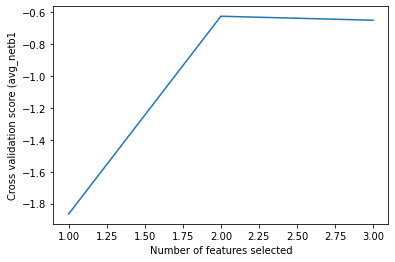

In [65]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (avg_netb1")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [66]:
important_rfecv_DT = (X_num_train.columns[rfecv.support_].to_list())
print(len(important_rfecv_DT),'\n', important_rfecv_DT)

189 
 ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V12', 'V13', 'V19', 'V20', 'V23', 'V24', 'V26', 'V30', 'V34', 'V35', 'V36', 'V37', 'V38', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V52', 'V53', 'V54', 'V55', 'V56', 'V59', 'V61', 'V62', 'V63', 'V65', 'V66', 'V67', 'V73', 'V75', 'V76', 'V77', 'V78', 'V80', 'V82', 'V83', 'V84', 'V86', 'V87', 'V91', 'V96', 'V97', 'V99', 'V102', 'V105', 'V108', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V135', 'V136', 'V137', 'V141', 'V142', 'V143', 'V147', 'V149', 'V151', 'V152', 'V156', 'V166', 'V169', 'V170', 'V173', 'V177', 'V180', 'V187', 'V188', 'V189', 'V194', 'V200', 'V203', 'V205', 'V208', 'V210', 'V212', 'V213', 'V215', 'V216', 'V221', 'V224', 

In [67]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_num_train[important_rfecv_DT], y_train, 
                                   X_num_val[important_rfecv_DT], y_val, 
                                   X_num_test[important_rfecv_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.95            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.38 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             -1.0           -1.06 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.92           -0.96 

Avg_Net_Benefits3 from test (left)

In [68]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_num_train[important_rfecv_DT], y_train, 
                                   X_num_val[important_rfecv_DT], y_val, 
                                   X_num_test[important_rfecv_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.84            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.53 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.22           -1.35 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.15           -1.26 

Avg_Net_Benefits3 from test (left) and from va

In [69]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_num_train[important_rfecv_DT], y_train, 
                                   X_num_val[important_rfecv_DT], y_val, 
                                   X_num_test[important_rfecv_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.87            0.87 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.77             0.8 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.41            0.48 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.55            0.67 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.7            0.86 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [70]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_num_train[important_rfecv_DT], y_train, 
                                   X_num_val[important_rfecv_DT], y_val, 
                                   X_num_test[important_rfecv_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.90            0.91
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.92            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.88            0.88 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.63            0.64
1  w20_DTC_ent8             0.73            0.74
2       rf_max8             0.59            0.61
3   w20_rf_max8             0.75            0.76
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.69            0.70 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.81            0.81
1  w20_DTC_ent8        

In [71]:

# Recursive feature elimination with cross-validation
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(RandomForestClassifier(random_state=42), step=0.5, cv=StratifiedKFold(2),
              scoring=avg_netb1,
              min_features_to_select=min_features_to_select)
rfecv.fit(X_num_train, y_train)
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,

In [72]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 189


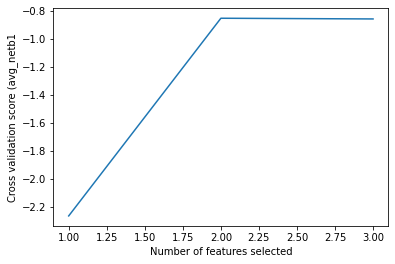

In [74]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (avg_netb1")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [75]:
important_rfecv_RF = (X_num_train.columns[rfecv.support_].to_list())
print(len(important_rfecv_RF),'\n', important_rfecv_RF)

189 
 ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V3', 'V4', 'V5', 'V7', 'V12', 'V13', 'V19', 'V20', 'V23', 'V24', 'V26', 'V33', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V47', 'V51', 'V52', 'V53', 'V54', 'V56', 'V61', 'V62', 'V66', 'V67', 'V75', 'V76', 'V77', 'V78', 'V82', 'V83', 'V86', 'V87', 'V94', 'V95', 'V96', 'V97', 'V99', 'V102', 'V103', 'V105', 'V124', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V136', 'V137', 'V148', 'V149', 'V152', 'V154', 'V155', 'V156', 'V158', 'V170', 'V172', 'V187', 'V188', 'V189', 'V190', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V207', 'V208', 'V209', 'V210', 'V212', 'V215', 'V218', 'V221', 'V222', 'V223', 'V225', 'V229', 'V230', 'V232', 'V233', 'V234', 'V242', 'V

In [77]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_num_train[important_rfecv_RF], y_train, 
                                   X_num_val[important_rfecv_RF], y_val, 
                                   X_num_test[important_rfecv_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.65 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.84            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.52 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.25           -1.38 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.19           -1.29 

Avg_Net_Benefits3 from test (left) and from va

In [78]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_num_train[important_rfecv_RF], y_train, 
                                   X_num_val[important_rfecv_RF], y_val, 
                                   X_num_test[important_rfecv_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.94            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.65            0.68 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.65            0.68 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.37 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.96           -1.04 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.88           -0.94 

Avg_Net_Benefits3 from test (left)

In [79]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_num_train[important_rfecv_RF], y_train, 
                                   X_num_val[important_rfecv_RF], y_val, 
                                   X_num_test[important_rfecv_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.87            0.87 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.77             0.8 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.4            0.46 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.54            0.64 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.69            0.83 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [80]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_num_train[important_rfecv_RF], y_train, 
                                   X_num_val[important_rfecv_RF], y_val, 
                                   X_num_test[important_rfecv_RF], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.89            0.90
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.92            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.89            0.88 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.62            0.64
1  w20_DTC_ent8             0.72            0.74
2       rf_max8             0.60            0.61
3   w20_rf_max8             0.74            0.75
4      lr_lbfgs             0.50            0.51
5  w20_lr_lbfgs             0.69            0.71 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.81            0.81
1  w20_DTC_ent8        

Build models with factor variables

In [81]:
trans_cat = train_transaction.select_dtypes(include='object')
trans_cat.columns.tolist()

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [82]:
# nafill('none') in categorical featuers
trans_cat_nafill = trans_cat.fillna('none')
# transform cat only dataframe to a sparse dummy dataframe   
enc = OneHotEncoder(dtype=np.int8)
mat = enc.fit_transform(trans_cat_nafill)
trans_cat_enc_df = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)

In [83]:
X_cat_train,y_train,X_cat_val, y_val, X_cat_test,y_test=fun_sorted_split_dist('trans_cat_enc_df',trans_cat_enc_df,trans_y,0.5,0.5)

shapes of X_train, X_val, X_test, y_train, y_val, y_test in trans_cat_enc_df: (295270, 164) (147635, 164) (147635, 164) (295270,) (147635,) (147635,) 

In trans_cat_enc_df train set (50.0%): 

96.65% or 285376 instances belong to class 0 

3.35% or 9894 instances belong to class 1 

In trans_cat_enc_df validation set (25.0%): 

96.16% or 141966 instances belong to class 0 

3.84% or 5669 instances belong to class 1 

In trans_cat_enc_df test set (25.0%): 

96.55% or 142535 instances belong to class 0 

3.45% or 5100 instances belong to class 1 



In [84]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.5            0.51 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.73            0.73 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.11            0.13 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.53           -3.04 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.53           -3.04 

Avg_Net_Benefits3 from test (left)

In [85]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier()], ['RF_default'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.5             0.5 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.74            0.74 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.11            0.12 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.55           -3.08 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.55           -3.08 

Avg_Net_Benefits3 from test (left) and from va

In [86]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.75            0.76 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.7            0.71 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.77            0.77 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.11            0.12 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.17            0.02 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.3            0.18 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [87]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.96
1  w20_DTC_ent8             0.80            0.82
2       rf_max8             0.97            0.96
3   w20_rf_max8             0.86            0.85
4      lr_lbfgs             0.97            0.96
5  w20_lr_lbfgs             0.81            0.82 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.50            0.50
1  w20_DTC_ent8             0.68            0.70
2       rf_max8             0.50            0.50
3   w20_rf_max8             0.68            0.69
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.69            0.71 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.77            0.78
1  w20_DTC_ent8        

**Handling Missing Data- Dimension Reduction**

In [88]:
# create list of cat colums of low missingness
low_miss_cat_cols = []
# drop columns with high missingness
features = list(trans_cat.columns)
for i in features:
  if trans_cat[i].isnull().sum()/trans_cat.shape[0] < 0.2:
    low_miss_cat_cols.append(i)
print(len(low_miss_cat_cols),'\n', low_miss_cat_cols)

4 
 ['ProductCD', 'card4', 'card6', 'P_emaildomain']


In [89]:
# nafill('none') in categorical featuers
# trans_cat_nafill = trans_cat.fillna('none')
# transform cat low miss only dataframe to a sparse dummy dataframe   
# enc = OneHotEncoder(dtype=np.int8)
mat = enc.fit_transform(trans_cat_nafill[low_miss_cat_cols])
trans_cat_low_miss_enc_df = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)

In [90]:
X_cat_low_miss_train,y_train,X_cat_low_miss_val, y_val, X_cat_low_miss_test,y_test=fun_sorted_split_dist(
    'trans_cat_low_miss_enc_df',trans_cat_low_miss_enc_df,trans_y,0.5,0.5)

shapes of X_train, X_val, X_test, y_train, y_val, y_test in trans_cat_low_miss_enc_df: (295270, 75) (147635, 75) (147635, 75) (295270,) (147635,) (147635,) 

In trans_cat_low_miss_enc_df train set (50.0%): 

96.65% or 285376 instances belong to class 0 

3.35% or 9894 instances belong to class 1 

In trans_cat_low_miss_enc_df validation set (25.0%): 

96.16% or 141966 instances belong to class 0 

3.84% or 5669 instances belong to class 1 

In trans_cat_low_miss_enc_df test set (25.0%): 

96.55% or 142535 instances belong to class 0 

3.45% or 5100 instances belong to class 1 



In [91]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_cat_low_miss_train, y_train, 
                                   X_cat_low_miss_val, y_val, 
                                   X_cat_low_miss_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.5             0.5 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.71            0.73 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.11            0.11 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.56           -3.14 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.56           -3.14 

Avg_Net_Benefits3 from test (left)

In [92]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_cat_low_miss_train, y_train, 
                                   X_cat_low_miss_val, y_val, 
                                   X_cat_low_miss_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.5             0.5 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.72            0.73 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.11            0.11 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.56           -3.14 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.56           -3.14 

Avg_Net_Benefits3 from test (left) and from va

In [93]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_cat_low_miss_train, y_train, 
                                   X_cat_low_miss_val, y_val, 
                                   X_cat_low_miss_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.77            0.78 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.68            0.69 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.72            0.74 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.11            0.12 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf            -0.16           -0.27 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf            -0.04           -0.13 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [94]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_cat_low_miss_train, y_train, 
                                   X_cat_low_miss_val, y_val, 
                                   X_cat_low_miss_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.96            0.96
1  w20_DTC_ent8             0.85            0.85
2       rf_max8             0.97            0.96
3   w20_rf_max8             0.85            0.85
4      lr_lbfgs             0.97            0.96
5  w20_lr_lbfgs             0.84            0.84 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.50            0.50
1  w20_DTC_ent8             0.66            0.67
2       rf_max8             0.50            0.50
3   w20_rf_max8             0.66            0.67
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.67            0.67 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.73            0.74
1  w20_DTC_ent8        

2. (4%) Write in a text cell, narrative explanations of your feature selection, and missing
data

ANSWER: To handle the missing data: I have replaced the NaN values with mean for the numeric variables and with none for the categorical variables. Also, I dropped the columns that had high missing values.


I used RFE and RFECV methods for Feature Selection. 
I used Decision Tree and Random Forest classifiers to perform RFE and both gave the same number of features as result. 

Further, to build the model I use selected features which are 193 :Total numeric features = 189 and categorical features= 4.

##3. (72%) Models building and evaluation using a train-validate-test approach

In [95]:
X_train = pd.concat([X_num_train[important_rfecv_DT],X_cat_low_miss_train], axis=1)
X_val = pd.concat([X_num_val[important_rfecv_DT],X_cat_low_miss_val], axis=1)
X_test = pd.concat([X_num_test[important_rfecv_DT],X_cat_low_miss_test], axis=1)

In [96]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_train, y_train, 
                                   X_val, y_val, 
                                   X_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.95            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.66 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.66 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.35 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             -1.0            -1.2 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.92            -1.1 

Avg_Net_Benefits3 from test (left)

In [97]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_train, y_train, 
                                   X_val, y_val, 
                                   X_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.84            0.87 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.41            0.54 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.23           -1.33 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.16           -1.24 

Avg_Net_Benefits3 from test (left) and from va

In [98]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_train, y_train, 
                                   X_val, y_val, 
                                   X_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.88            0.88 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.78             0.8 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.87            0.89 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.42            0.49 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.64             0.7 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.8            0.89 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [99]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_train, y_train, 
                                   X_val, y_val, 
                                   X_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.90            0.91
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.92            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.87            0.87 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.63            0.64
1  w20_DTC_ent8             0.72            0.73
2       rf_max8             0.59            0.61
3   w20_rf_max8             0.75            0.76
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.69            0.70 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.81            0.81
1  w20_DTC_ent8        

**Based on the performance of models above, I would recommend Balanced Random Forest Classifier- brf as the best model.**

Given the best ROc and PRC values:


**Balanced_accuracy from test (left) and from validation (right)**



  clf_name    test_set_result    val_set_result  
0      brf             0.78             0.8 



**Area_Under_ROC from test (left) and from validation (right)**



  clf_name  test_set_result  val_set_result  
0      brf             0.87            0.89 



**Area_Under_PRC from test (left) and from validation (right)**



  clf_name  test_set_result  val_set_result


0      brf             0.42            0.49

##Section 2 Impact analysis (16%)


1. (6%) Net benefit - Write in one or more text cells to explain:


a. The potential net benefit a stakeholder of the focal application of your project may
experience if the recommended model is deployed. 

**ANSWER** The net benefit that the stakeholder will experience from BRF model will be 0.88 (cb_factor2)


b. The reasons for the cost and benefit factors you have chosen for this analysis.


**ANSWER:** The reason for choosing this cost and benefit factors are th eassumption that 20 opportunity cost for a nonfraud transaction that couldn't go throughand assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense.

2. (10%) Sensitive analysis
a. Use code cells to perform this step - Choose two different sets of values of cost
and benefit factors. Run code to show the impact of these changes on the
average net benefit of the recommended model.
b. Write in one or more text cells the reasons for choosing the values you used in
this sensitive analysis and how the resulting net benefit could affect the focal
stakeholder of your application.

In [100]:
cb_factors_p2 = np.array([[nonfraud_prft,round(-0.05*(nonfraud_prft),3)],[fraud_cost,round(-fraud_cost*0.05,3)]])
print(cb_factors_p2,'\n')

cb_factors_p3 = np.array([[nonfraud_prft/2,0],[fraud_cost,0]])
print(cb_factors_p3,'\n')


[[   1.345    0.   ]
 [-149.245    0.   ]] 

[[ 1.34500e+00 -6.70000e-02]
 [-1.49245e+02  7.46200e+00]] 



In [ ]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_train, y_train, 
                                   X_val, y_val, 
                                   X_test, y_test, 'data_source')

The reason for choosing this cost and benefit factors are th eassumption that 20 opportunity cost for a nonfraud transaction that couldn't go throughand assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense.

The result will benefit the stakeholder as the credit card owner will not have to pay for the fraud commit and the credit card company will pay only a limited amount of compensation which would still be less than the profit earned. Therfore, company will still be benefited.

## Generate HTML

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/Project_M2_Harinkhere_Manali.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "Project_M2_Harinkhere_Manali.ipynb"